In [5]:
from data_ingestion_tools import data_ingestion_tools
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Table Of Contents

### [Data Preparation](#subsection-1)
The MNIST Data that has been downloaded will be converted into a Pandas DataFrame.

### [Neural Network](#subsection-2)
A Neural Network will be trained to classify the MNIST Data.

### [LE-NET 5 (Convolution Neural Network)](#subsection-3)
The Classic Convolution Neural Network, Le-NET 5, will be trained to classify the MNIST Data.

### [Defining Model Comparison and Evaluation](#conclusion)
Comparison and Limitations of each Model will be explored.


#### <a id='subsection-1'>1. Data Preparation</a>

Training (as-well as Validation) and testing MNIST Data is prepared by:    
1. Firstly the function read_idx_file is called from the data_ingestion_toolkit class and the training and testing datasets is pulled.  
2. The labels are then encoded into one-hot format using the LabelEncoder and to_categorical functions from the scikit-learn and TensorFlow libraries, respectively.  
3. The images are flattened to create one-dimensional arrays using the reshape method, making them suitable for representation as rows in a Pandas DataFrame.  
4. Finally, two DataFrames (train_df and test_df) are created from the flattened image data, where each row corresponds to a flattened image in the training or testing dataset.

In [6]:
# call data_ingestion_toolbox
dit = data_ingestion_tools()


In [7]:
# Define file paths for MNIST dataset
train_images_path = 'data/train-images-idx3-ubyte.gz'
train_labels_path = 'data/train-labels-idx1-ubyte.gz'
test_images_path = 'data/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'

In [8]:
# Read training and testing data
train_images = dit.read_idx_file(train_images_path)
train_labels = dit.read_idx_file(train_labels_path)
test_images = dit.read_idx_file(test_images_path)
test_labels = dit.read_idx_file(test_labels_path)

# Convert labels to one-hot encoded format
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_encoded = label_encoder.fit_transform(test_labels)
test_labels_one_hot = to_categorical(test_labels_encoded)

# Flatten the images for DataFrame representation
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# Create DataFrames for training and testing data
train_df = pd.DataFrame(train_images_flat)
test_df = pd.DataFrame(test_images_flat)

# Display the DataFrames
print("Training DataFrame:")
print(train_df.shape)

print("\nTesting DataFrame:")
print(test_df.shape)

Training DataFrame:
(60000, 784)

Testing DataFrame:
(10000, 784)


#### <a id='subsection-2'>2. Normal NN</a>

The following steps are used in training a neural network using TensorFlow and Keras: 
1. The data is first split into training and validation sets using the train_test_split function.  
2. Next, the training, validation, and test data and labels are converted into TensorFlow tensors.  
3. Following this, a neural network is defined using Keras, consisting of a couple of dense layers with specified activation functions and L2 regularization.  
    - The regularization term is added to the dense layers to help prevent overfitting during training.  
4. The model is then compiled with an Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.  
5. The training process is initiated using the fit method, with training data, validation data, and specified batch size and epochs.  
6. Finally, the trained model is evaluated on the test set, and the test loss and accuracy are printed. 

In [9]:
# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    train_df, train_labels_one_hot, test_size=0.2, random_state=42)

# Convert training data and labels to TensorFlow tensors
features_train_tensor = tf.constant(train_data)
labels_train_tensor = tf.constant(train_labels)

# Convert validation data and labels to TensorFlow tensors
features_val_tensor = tf.constant(val_data)
labels_val_tensor = tf.constant(val_labels)

# Convert test data and labels to TensorFlow tensors
features_test_tensor = tf.constant(test_df)
labels_test_tensor = tf.constant(test_labels_one_hot)


# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(784,)),
    tf.keras.layers.Dense(units=84, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Hidden layer
    tf.keras.layers.Dense(units=10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01 ))  # Output layer with L2 regularization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
batch_size = 64
epochs = 20

NNhistory = model.fit(
    features_train_tensor, labels_train_tensor,
    epochs=epochs, batch_size=batch_size,
    validation_data=(features_val_tensor, labels_val_tensor), shuffle=True)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(features_test_tensor, labels_test_tensor)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 4.5987 - accuracy: 0.8356 - val_loss: 2.4307 - val_accuracy: 0.8858
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 1.9440 - accuracy: 0.9134 - val_loss: 1.6289 - val_accuracy: 0.9244
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 1.3218 - accuracy: 0.9397 - val_loss: 1.1120 - val_accuracy: 0.9464
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.9058 - accuracy: 0.9521 - val_loss: 0.7902 - val_accuracy: 0.9459
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.6341 - accuracy: 0.9575 - val_loss: 0.5641 - val_accuracy: 0.9526
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4623 - accuracy: 0.9601 - val_loss: 0.4127 - val_accuracy: 0.9591
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3556 - accuracy: 0.9613 - val_loss: 0.3296 - val_accuracy: 0.9612
Epoch 

#### <a id='subsection-3'>3.CNN Implementation</a>

The following steps are used in training LE-NET 5 a convolutional neural network using TensorFlow and Keras: 
1. The data is first split into training and validation sets using the train_test_split function.  
2. Next, the training, validation, and test data and labels are converted into TensorFlow tensors.  
3. Following this, a convolutional neural network is defined using Keras with the same model architecture as LE-NET 5 and added L2 regularization.  
    - The regularization term is added to the dense and conv layers to help prevent overfitting during training.  
4. The model is then compiled with an Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.  
5. The training process is initiated using the fit method, with training data, validation data, and specified batch size and epochs.  
6. Finally, the trained model is evaluated on the test set, and the test loss and accuracy are printed. 

In [10]:
# assuming grayscale images
features_images = train_df.to_numpy().reshape(-1, 28, 28, 1)  
test_images = test_df.to_numpy().reshape(-1, 28, 28, 1)  

# Normalize pixel values to the range [0, 1]
features_images = features_images / 255.0
test_images = test_images / 255.0

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    features_images, train_labels_one_hot, test_size=0.2, random_state=42)

# Convert training data and labels to TensorFlow tensors
features_train_tensor = tf.constant(train_data)
labels_train_tensor = tf.constant(train_labels)

# Convert validation data and labels to TensorFlow tensors
features_val_tensor = tf.constant(val_data)
labels_val_tensor = tf.constant(val_labels)

# Convert test data and labels to TensorFlow tensors
features_test_tensor = tf.constant(test_images)
labels_test_tensor = tf.constant(test_labels_one_hot)

# Build the LeNet-5 model with L2 regularization
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(84, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
batch_size = 64
epochs = 20

CNNhistory = model.fit(
    features_train_tensor, labels_train_tensor,
    epochs=epochs, batch_size=batch_size,
    validation_data=(features_val_tensor, labels_val_tensor), shuffle=True)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(features_test_tensor, labels_test_tensor)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/20
750/750 [==============================] - 9s 8ms/step - loss: 0.9602 - accuracy: 0.8969 - val_loss: 0.4815 - val_accuracy: 0.9506
Epoch 2/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4076 - accuracy: 0.9567 - val_loss: 0.3636 - val_accuracy: 0.9613
Epoch 3/20
750/750 [==============================] - 10s 13ms/step - loss: 0.3480 - accuracy: 0.9616 - val_loss: 0.3488 - val_accuracy: 0.9553
Epoch 4/20
750/750 [==============================] - 10s 14ms/step - loss: 0.3212 - accuracy: 0.9632 - val_loss: 0.3176 - val_accuracy: 0.9643
Epoch 5/20
750/750 [==============================] - 10s 14ms/step - loss: 0.3064 - accuracy: 0.9659 - val_loss: 0.3184 - val_accuracy: 0.9662
Epoch 6/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2939 - accuracy: 0.9666 - val_loss: 0.3021 - val_accuracy: 0.9639
Epoch 7/20
750/750 [==============================] - 11s 14ms/step - loss: 0.2833 - accuracy: 0.9678 - val_loss: 0.2802 - val_accuracy: 0.9

#### <a id='conclusion'>4. Defining Model Comparison and Evaluation</a>

##### 4.1 Training and Evalution

In the Plots Below, It can be seen that the Convolutional Neural Network Converges quicker than the Standard Neural Network Models.  
- The CNN Model always has a higher Training and Validation Accuracy and Mostly lower Training and Validation Loss

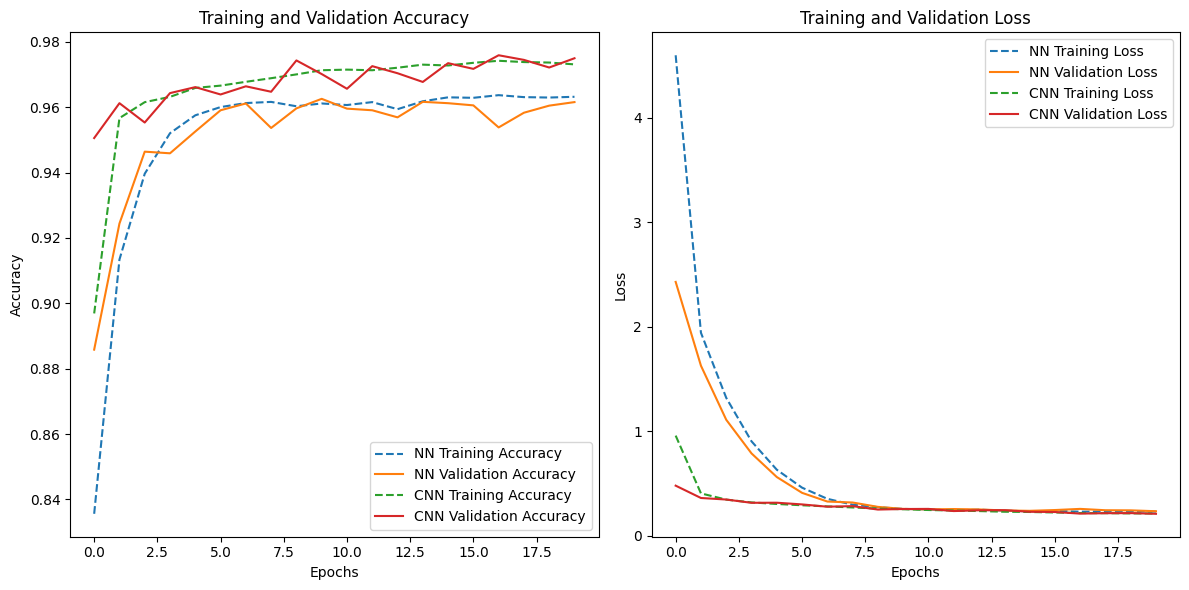

In [11]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(NNhistory.history['accuracy'], label='NN Training Accuracy', linestyle='--')
plt.plot(NNhistory.history['val_accuracy'], label='NN Validation Accuracy')
plt.plot(CNNhistory.history['accuracy'], label='CNN Training Accuracy', linestyle='--')
plt.plot(CNNhistory.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(NNhistory.history['loss'], label='NN Training Loss', linestyle='--')
plt.plot(NNhistory.history['val_loss'], label='NN Validation Loss')
plt.plot(CNNhistory.history['loss'], label='CNN Training Loss', linestyle='--')
plt.plot(CNNhistory.history['val_loss'], label='CNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### 4.2 Convolutional Neural Networks vs. Neural Networks

- Handling Spatial Information
- Parameter Sharing
- Translation Invariance
- Data Efficiency
- Performance on Image Data

##### 4.3 Details of Le-Net5